# Whatsapp Chat Analysis

## To Do

- ~Get text File~ - Exported from Whatsapp into txt file
- ~Split the strings into rows~ - Using python to split the txt into a list of strings seemed better than diviing straight into pandas df. Error handling in df meant losing message data due to cutting off any long messages. 
- ~Split into columns~ Splitting the data in a df was easier than splitting initial list 
- ~Clean data~ NaN value caught me out here

- Analyse

## Time

- 13/09/2021 - 2 hrs
- 14/09/2021 - 1.5 hrs
- 15/09/2021 - 1 hr
- 17/09/2021 - 1.5 hrs
- 18/09/2021 - 6 hrs
- 19/09/2021 - 0.5 hrs
- 27/09/2021 - 1 hr
- 28/09/2021 - 3.5 hrs
- 29/09/2021 - 0.5 hrs
- 05/10/2021 - 0.75 hrs
- 05/12/2021 - 4 hrs
- 09/12/2021 - 1.5 hrs
- 10/12/2021 - 1 hr
- 23/12/2021 - 2 hrs

In [1]:
import pandas as pd
import pandas_bokeh
pandas_bokeh.output_notebook()
from bokeh.plotting import figure, show
import matplotlib.pyplot as plt
import io

Loading BokehJS ...

## Sort and clean data

In [2]:
#Split text string into rows/list to read into data frame 

File = "/Users/grantmalone/Desktop/Data Science/Whatsapp Project/Seb_chat.txt"

def read_file(File): #function to read txt file as list of strings 
    x = open(File, 'r', encoding = 'utf-8') #'r' opens as read, 'utf-8' to read funky characters etc 
    y = x.read() #big chunk of string right now
    content = y.splitlines() #converts chunk of string into list
    return content

chat = read_file(File)

In [3]:
df = pd.DataFrame({'Message':chat}) #couldn't split later using (chat, columns = 'Message'), column counts were wrong
df

Message
0       [23/07/2013, 16:39:40] ‎‪+44 7411 112173‬ chan...
1       [23/07/2013, 17:27:05] ‎‪+44 7411 112173‬ was ...
2       [23/07/2013, 17:27:05] ‎‪+44 7753 313553‬ was ...
3       [23/07/2013, 17:27:05] ‎Matthew Reynolds was a...
4           [23/07/2013, 17:27:06] ‎Luke Kearns was added
...                                                   ...
440683  [22/12/2021, 14:32:42] Matthew Reynolds: Nah l...
440684  [22/12/2021, 14:32:52] Matthew Reynolds: It’s ...
440685                 [22/12/2021, 14:36:14] Lee Ross: 🤯
440686  [22/12/2021, 14:36:47] Lee Ross: Convinced Ren...
440687  [22/12/2021, 14:37:17] Matthew Reynolds: Look ...

[440688 rows x 1 columns]

In [4]:
#Split Columns into useable data

df[['Date','Message']] = df['Message'].str.split(',', n=1, expand=True)
df[['Time','Message']] = df['Message'].str.split(']', n=1, expand=True)
df[['Name','Message']] = df['Message'].str.split(':', n=1, expand=True)
df

Message         Date  \
0                                                    None  [23/07/2013   
1                                                    None  [23/07/2013   
2                                                    None  [23/07/2013   
3                                                    None  [23/07/2013   
4                                                    None  [23/07/2013   
...                                                   ...          ...   
440683   Nah like so apparently some people can smell ...  [22/12/2021   
440684                          It’s like a genetic thing  [22/12/2021   
440685                                                  🤯  [22/12/2021   
440686   Convinced Ren got covid from licking some doo...  [22/12/2021   
440687                          Look it up then you freak  [22/12/2021   

             Time                                               Name  
0        16:39:40   ‎‪+44 7411 112173‬ changed the subject to “Th...  
1        17:27:05                       ‎‪+44 7411 112173‬ was added  
2        17:27:05                       ‎‪+44 7753 313553‬ was added  
3        17:27:05                        ‎Matthew Reynolds was added  
4        17:27:06                             ‎Luke Kearns was added  
...           ...                                                ...  
440683   14:32:42                                   Matthew Reynolds  
440684   14:32:52                                   Matthew Reynolds  
440685   14:36:14                                           Lee Ross  
440686   14:36:47                                           Lee Ross  
440687   14:37:17                                   Matthew Reynolds  

[440688 rows x 4 columns]

In [5]:
#Save scrap data
#Could have the old group chat names in it

df_removeddata = df[df['Message'].isnull()]
a = df_removeddata['Name'].unique()
#a

#Everything in those rows are NaN - how to convert to string?

In [10]:
#Clean data 

#Took ages to drop the 'None' value because it wasn't actually a string value, it was NaN.

df = df[['Date', 'Time', 'Name', 'Message']]     #Swap columns round

df['Date'] = df['Date'].str.replace('[','') #Remove brackets in date

df['Name'] = df['Name'].str.strip() #remove spaces beginning and end of names 

df['Name'] = df['Name'].replace(['\u202a+44\xa07891\xa0712420\u202c'],'Harris') #Replace Harris' old number
df['Name'] = df['Name'].replace(['\u202a+44\xa07393\xa0314755\u202c'],'Harris')
df['Name'] = df['Name'].replace(['\u202a+44\xa07772\xa0343945\u202c'],'Gaeton')
df['Name'] = df['Name'].replace(['\u202a+44\xa07753\xa0313553\u202c'],'Chris Thom')
df['Name'] = df['Name'].replace(['\u202a+44\xa07411\xa0112173\u202c'],'Lee Ross')
df['Name'] = df['Name'].replace(['\u202a+44\xa07584\xa0199477\u202c'],'Michael Deans')
df['Name'] = df['Name'].replace(['\u202a+44\xa07894\xa0220385\u202c'],'Joel Geider')
df['Name'] = df['Name'].replace(['\u202a+44\xa07437\xa0401826\u202c'],'Seb Leslie')


df = df.loc[df["Name"] != 'Mark the Super Spreader'] #Drop Whatsapp server messages (Drop >3 words would be more robust)
df = df.loc[df["Name"] != '\u202a+44\xa07549\xa0283132\u202c'] #Remove Ryzie
df = df[~df.Name.str.contains("changed")]


df.dropna(subset = ["Message"], inplace=True) #Drop NaN values

df['Message'] = df['Message'].str.lower()


#Dropping NaN values before cleaning 'Date' caused a SettingWithCopyWarning - Something to do with changing/not changing original df

df

Date       Time              Name  \
16       23/07/2013   17:15:19        Chris Thom   
17       23/07/2013   17:16:44  Matthew Reynolds   
18       23/07/2013   17:23:30          Lee Ross   
19       23/07/2013   17:51:48      Alex McMahon   
20      ‎23/07/2013   19:27:27        Seb Leslie   
...             ...        ...               ...   
440683   22/12/2021   14:32:42  Matthew Reynolds   
440684   22/12/2021   14:32:52  Matthew Reynolds   
440685   22/12/2021   14:36:14          Lee Ross   
440686   22/12/2021   14:36:47          Lee Ross   
440687   22/12/2021   14:37:17  Matthew Reynolds   

                                                  Message  
16                        what's everyone doing saturday?  
17                              driving round silverstone  
18                                 catching up on pornhub  
19                         football night out. why chris?  
20                                         ‎image omitted  
...                                                   ...  
440683   nah like so apparently some people can smell ...  
440684                          it’s like a genetic thing  
440685                                                  🤯  
440686   convinced ren got covid from licking some doo...  
440687                          look it up then you freak  

[438150 rows x 4 columns]

In [11]:
a = df['Name'].unique()
a

array(['Chris Thom', 'Matthew Reynolds', 'Lee Ross', 'Alex McMahon',
       'Seb Leslie', 'Mark Foster', 'Craig Reid', 'Luke Kearns',
       'Craig McRae', 'Grant Malone', 'Blair Fyfe', 'Gaeton',
       'Stuart Blackburn', 'Michael Deans', 'Joel Geider', 'Harris'],
      dtype=object)

# Analysis 

## To Do 

- ~Who's sent the most messages~
    - Count names
    
- ~Message rate for each person graphed over time~
    - Per month, name count. graphed against time
    
- ~Who laughs the most~
    - Instances of 'ha' per person. Make laugh count column 
    
- ~Who swears the most, as swears per 100 words?~
    - Make swear column 

- ~Most active day (average)~

- ~Most active month (average)~

- ~Most active day ever~

- ~Most active year~

- ~List of chat names~


In [12]:
#Add required columns 

df['Laughs'] = df['Message'].str.count('haha|Haha|😂')
df['Swear'] = df['Message'].str.count('fuck|shit|bloody|bitch|bullshit|bastard|dick|cunt|motherfucker|fs')
df['Word Count'] = df['Message'].str.split().str.len()
df['Message_Count'] = 1

df

Date       Time              Name  \
16       23/07/2013   17:15:19        Chris Thom   
17       23/07/2013   17:16:44  Matthew Reynolds   
18       23/07/2013   17:23:30          Lee Ross   
19       23/07/2013   17:51:48      Alex McMahon   
20      ‎23/07/2013   19:27:27        Seb Leslie   
...             ...        ...               ...   
440683   22/12/2021   14:32:42  Matthew Reynolds   
440684   22/12/2021   14:32:52  Matthew Reynolds   
440685   22/12/2021   14:36:14          Lee Ross   
440686   22/12/2021   14:36:47          Lee Ross   
440687   22/12/2021   14:37:17  Matthew Reynolds   

                                                  Message  Laughs  Swear  \
16                        what's everyone doing saturday?       0      0   
17                              driving round silverstone       0      0   
18                                 catching up on pornhub       0      0   
19                         football night out. why chris?       0      0   
20                                         ‎image omitted       0      0   
...                                                   ...     ...    ...   
440683   nah like so apparently some people can smell ...       0      0   
440684                          it’s like a genetic thing       0      0   
440685                                                  🤯       0      0   
440686   convinced ren got covid from licking some doo...       0      0   
440687                          look it up then you freak       0      0   

        Word Count  Message_Count  
16               4              1  
17               3              1  
18               4              1  
19               5              1  
20               2              1  
...            ...            ...  
440683          13              1  
440684           5              1  
440685           1              1  
440686           9              1  
440687           6              1  

[438150 rows x 8 columns]

In [13]:
#Laugh rate calculation

totallaughs = df.groupby('Name')[['Laughs', 'Word Count']].agg('sum')
totallaughs['Laugh_Rate'] = totallaughs['Word Count']/totallaughs['Laughs']
totallaughs = totallaughs.sort_values('Laugh_Rate')
totallaughs = totallaughs.drop(['Laughs', 'Word Count'], axis = 1)
totallaughs


Laugh_Rate
Name                        
Gaeton             21.000000
Joel Geider        22.663752
Blair Fyfe         23.227587
Luke Kearns        23.796825
Mark Foster        24.928340
Alex McMahon       28.514890
Seb Leslie         28.962963
Craig McRae        29.899473
Lee Ross           34.145738
Grant Malone       37.572692
Matthew Reynolds   38.401401
Michael Deans      40.516461
Chris Thom         55.608081
Stuart Blackburn   61.674556
Harris             73.081395
Craig Reid         98.357852

In [14]:
#Swear rate calculation

totalswears = df.groupby('Name')[['Swear', 'Word Count']].agg('sum')
totalswears['Swear_Rate'] = totalswears['Word Count']/totalswears['Swear']
totalswears = totalswears.sort_values('Swear_Rate')
totalswears = totalswears.drop(['Swear', 'Word Count'], axis = 1)
totalswears

Swear_Rate
Name                        
Luke Kearns        59.178947
Gaeton             63.000000
Blair Fyfe         68.931848
Michael Deans      73.680075
Craig McRae        76.090326
Mark Foster        99.370909
Harris            101.045016
Grant Malone      101.532812
Chris Thom        106.930512
Seb Leslie        110.466778
Lee Ross          111.901919
Alex McMahon      113.782511
Matthew Reynolds  116.279050
Joel Geider       131.995370
Craig Reid        146.510435
Stuart Blackburn  170.868852

In [15]:
df["Date"] = pd.to_datetime(df["Date"], format = '%d/%m/%Y', errors = 'coerce') #convert date to datetime format

## Messages plotted over time

In [16]:
#Grouping data for time series analysis 

df["Month_Year"] = pd.to_datetime(df['Date']).dt.to_period('M') #Create new column with Month and year
Monthdata = df.groupby([(df["Month_Year"]),(df['Name'])])['Message_Count'].sum() #Group
time_group = pd.DataFrame(Monthdata).unstack(level=-1) #Pivot grouping table
time_group.columns = time_group.columns.droplevel() #Drop 'Message_Count'column
time_group

Name        Alex McMahon  Blair Fyfe  Chris Thom  Craig McRae  Craig Reid  \
Month_Year                                                                  
2013-07             61.0        58.0       189.0        101.0        37.0   
2013-08            345.0       163.0        97.0        174.0       113.0   
2013-09            255.0       187.0       158.0        271.0       167.0   
2013-10            222.0        38.0       125.0        112.0       114.0   
2013-11            352.0       125.0       159.0        321.0        84.0   
...                  ...         ...         ...          ...         ...   
2021-08            357.0       129.0       258.0        181.0       183.0   
2021-09             44.0        37.0       145.0         64.0        39.0   
2021-10             83.0        73.0       234.0         72.0       118.0   
2021-11             78.0        52.0       183.0         55.0       131.0   
2021-12             99.0        71.0       216.0         62.0       101.0   

Name        Gaeton  Grant Malone  Harris  Joel Geider  Lee Ross  Luke Kearns  \
Month_Year                                                                     
2013-07        3.0          19.0     NaN          NaN      83.0         10.0   
2013-08        6.0         164.0     NaN         62.0     281.0         31.0   
2013-09        NaN         198.0     NaN        112.0     216.0         94.0   
2013-10        3.0          98.0     NaN         54.0      85.0         59.0   
2013-11        7.0         202.0     NaN         37.0     179.0         92.0   
...            ...           ...     ...          ...       ...          ...   
2021-08        NaN         109.0     NaN          6.0      83.0        128.0   
2021-09        NaN          67.0     NaN          8.0      39.0         66.0   
2021-10        NaN         142.0     NaN         31.0      28.0        136.0   
2021-11        NaN         119.0     NaN          8.0      52.0        209.0   
2021-12        NaN         141.0     NaN         55.0      73.0        141.0   

Name        Mark Foster  Matthew Reynolds  Michael Deans  Seb Leslie  \
Month_Year                                                             
2013-07           223.0              34.0            NaN       170.0   
2013-08           380.0             129.0           87.0       391.0   
2013-09           154.0             103.0          116.0       600.0   
2013-10           178.0              50.0           40.0       327.0   
2013-11           173.0              75.0          101.0       298.0   
...                 ...               ...            ...         ...   
2021-08           241.0             160.0           82.0        42.0   
2021-09            78.0              37.0            NaN        51.0   
2021-10           129.0             214.0          106.0        36.0   
2021-11           121.0             120.0          164.0        30.0   
2021-12           153.0             193.0          148.0       127.0   

Name        Stuart Blackburn  
Month_Year                    
2013-07                  1.0  
2013-08                 45.0  
2013-09                 22.0  
2013-10                 35.0  
2013-11                 40.0  
...                      ...  
2021-08                 16.0  
2021-09                  3.0  
2021-10                  NaN  
2021-11                  1.0  
2021-12                 17.0  

[102 rows x 16 columns]

Text(0, 0.5, 'Message Count')

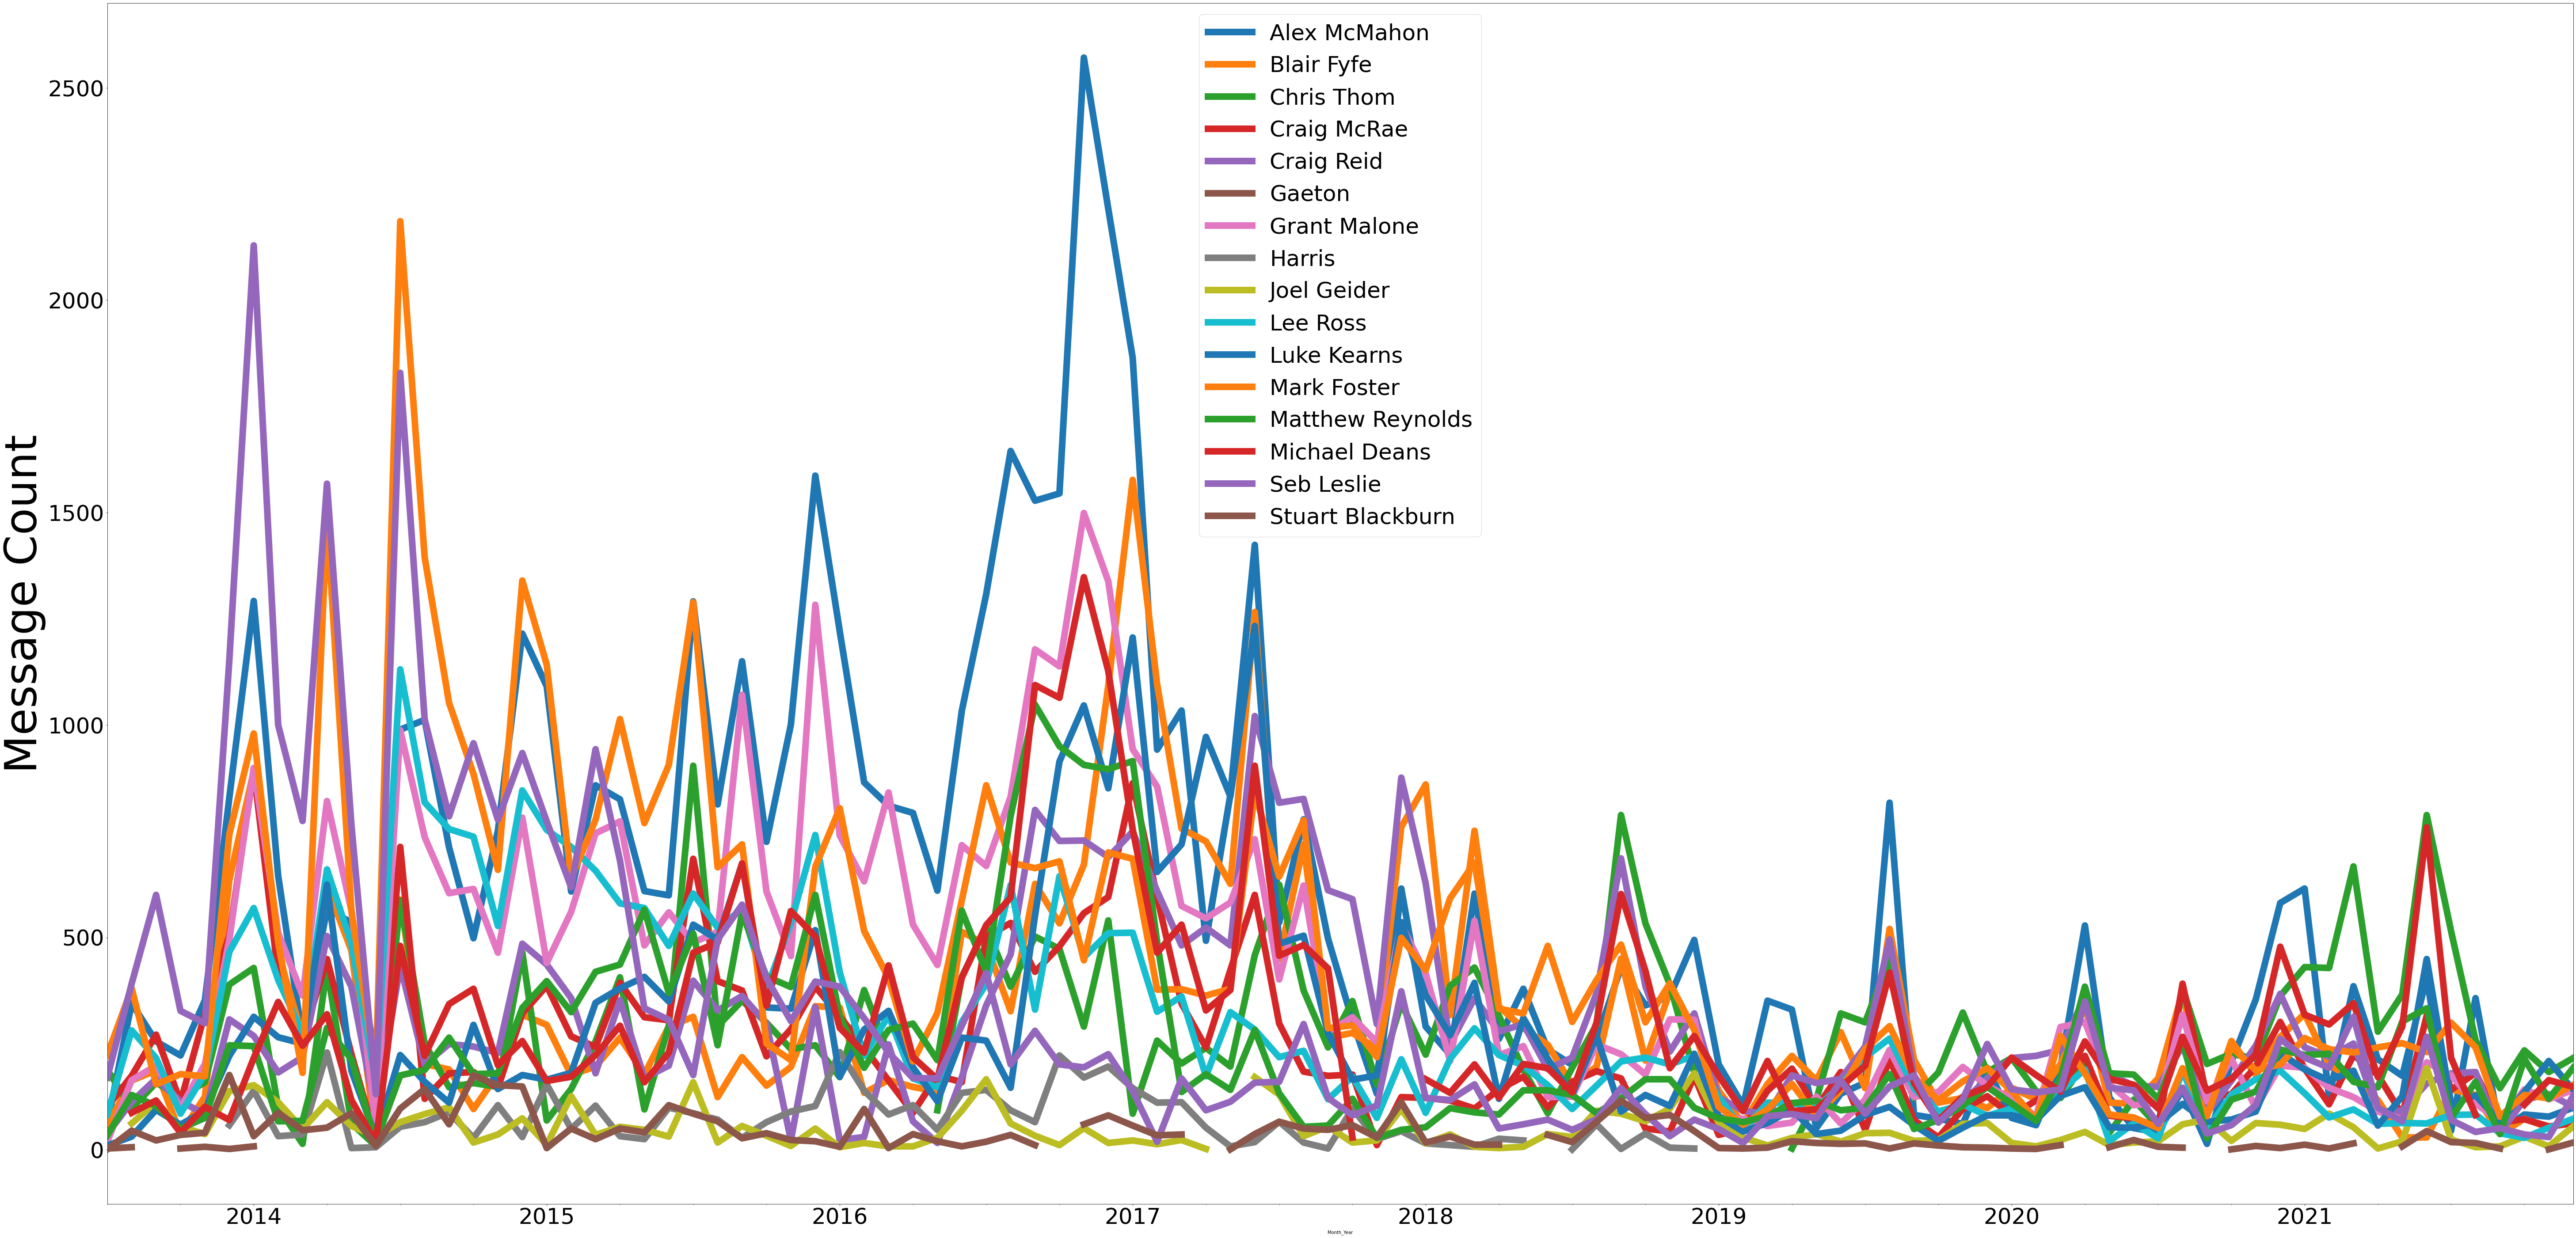

In [17]:
#Plot data for messages over time

FreqPlot = time_group.plot(figsize=(100,50), linewidth = 15, fontsize = 50)
FreqPlot.legend(loc=9, prop={'size': 50})
FreqPlot.set_ylabel('Message Count',fontdict={'fontsize':100})

#Graph's too messy to read so decided to do an average % increase/decrease to smooth it out

In [18]:
#Calculating mean for each person

time_group2 = pd.DataFrame(Monthdata).unstack(level=-1) #Data from before
time_group2 = pd.DataFrame(time_group2.mean()).unstack(level=-1) #Mean value for each person in same format as above table
time_group2.columns = time_group2.columns.droplevel() #Drop '0' level
time_group2

Name           Alex McMahon  Blair Fyfe  Chris Thom  Craig McRae  Craig Reid  \
Message_Count    579.705882  319.352941  283.795918   238.401961  300.098039   

Name             Gaeton  Grant Malone  Harris  Joel Geider    Lee Ross  \
Message_Count  4.833333    411.431373   71.55        50.36  286.931373   

Name           Luke Kearns  Mark Foster  Matthew Reynolds  Michael Deans  \
Message_Count   268.186275   450.156863        237.627451     309.122449   

Name           Seb Leslie  Stuart Blackburn  
Message_Count  314.362745         38.736842

In [19]:
#Calculating mean for whole chat



In [20]:
#Adding to table and calculating % increase/decrease

time_group3 = pd.concat([time_group, time_group2]) #Add mean value to new table
time_group4 = ((time_group3.loc[:,'Alex':]-time_group3.iloc[-1]['Alex':]).div(time_group3.iloc[-1]['Alex':]))*100 #Calculate % Increase/Decrease from mean
time_group4.drop(time_group4.tail(1).index,inplace=True) #Drop calculation (last) row
time_group4

Name     Alex McMahon  Blair Fyfe  Chris Thom  Craig McRae  Craig Reid  \
2013-07    -89.477423  -81.838276  -33.402848   -57.634577  -87.670696   
2013-08    -40.487062  -48.959293  -65.820509   -27.014023  -62.345639   
2013-09    -56.012177  -41.444097  -44.326190    13.673562  -44.351519   
2013-10    -61.704718  -88.100939  -55.954264   -53.020521  -62.012414   
2013-11    -39.279554  -60.858353  -43.973824    34.646544  -72.009147   
...               ...         ...         ...          ...         ...   
2021-08    -38.417047  -59.605821   -9.089602   -24.077806  -39.019928   
2021-09    -92.409944  -88.414073  -48.906947   -73.154583  -87.004247   
2021-10    -85.682395  -77.141278  -17.546383   -69.798906  -60.679516   
2021-11    -86.544901  -83.717075  -35.517043   -76.929720  -56.347599   
2021-12    -82.922374  -77.767545  -23.888969   -73.993502  -66.344332   

Name        Gaeton  Grant Malone  Harris  Joel Geider   Lee Ross  Luke Kearns  \
2013-07 -37.931034    -95.381976     NaN          NaN -71.073222   -96.271248   
2013-08  24.137931    -60.139160     NaN    23.113582  -2.067175   -88.440870   
2013-09        NaN    -51.875328     NaN   122.398729 -24.720675   -64.949735   
2013-10 -37.931034    -76.180718     NaN     7.227959 -70.376192   -78.000366   
2013-11  44.827586    -50.903112     NaN   -26.528991 -37.615745   -65.695485   
...            ...           ...     ...          ...        ...          ...   
2021-08        NaN    -73.507125     NaN   -88.085782 -71.073222   -52.271980   
2021-09        NaN    -83.715389     NaN   -84.114376 -86.407900   -75.390239   
2021-10        NaN    -65.486346     NaN   -38.443209 -90.241569   -49.288978   
2021-11        NaN    -71.076586     NaN   -84.114376 -81.877200   -22.069092   
2021-12        NaN    -65.729400     NaN     9.213662 -74.558376   -47.424602   

Name     Mark Foster  Matthew Reynolds  Michael Deans  Seb Leslie  \
2013-07   -50.461713        -85.691889            NaN  -45.922345   
2013-08   -15.584981        -45.713343     -71.855813   24.378606   
2013-09   -65.789703        -56.654840     -62.474417   90.862311   
2013-10   -60.458228        -78.958660     -87.060144    4.019959   
2013-11   -61.568952        -68.437990     -67.326863   -5.205052   
...              ...               ...            ...         ...   
2021-08   -46.463107        -32.667712     -73.473295  -86.639638   
2021-09   -82.672707        -84.429408            NaN  -83.776704   
2021-10   -71.343323         -9.943065     -65.709381  -88.548261   
2021-11   -73.120481        -49.500784     -46.946590  -90.456884   
2021-12   -66.011848        -18.780427     -52.122533  -59.600811   

Name     Stuart Blackburn  
2013-07        -97.418478  
2013-08         16.168478  
2013-09        -43.206522  
2013-10         -9.646739  
2013-11          3.260870  
...                   ...  
2021-08        -58.695652  
2021-09        -92.255435  
2021-10               NaN  
2021-11        -97.418478  
2021-12        -56.114130  

[102 rows x 16 columns]

Text(0, 0.5, '% Increase/Decrease From Average')

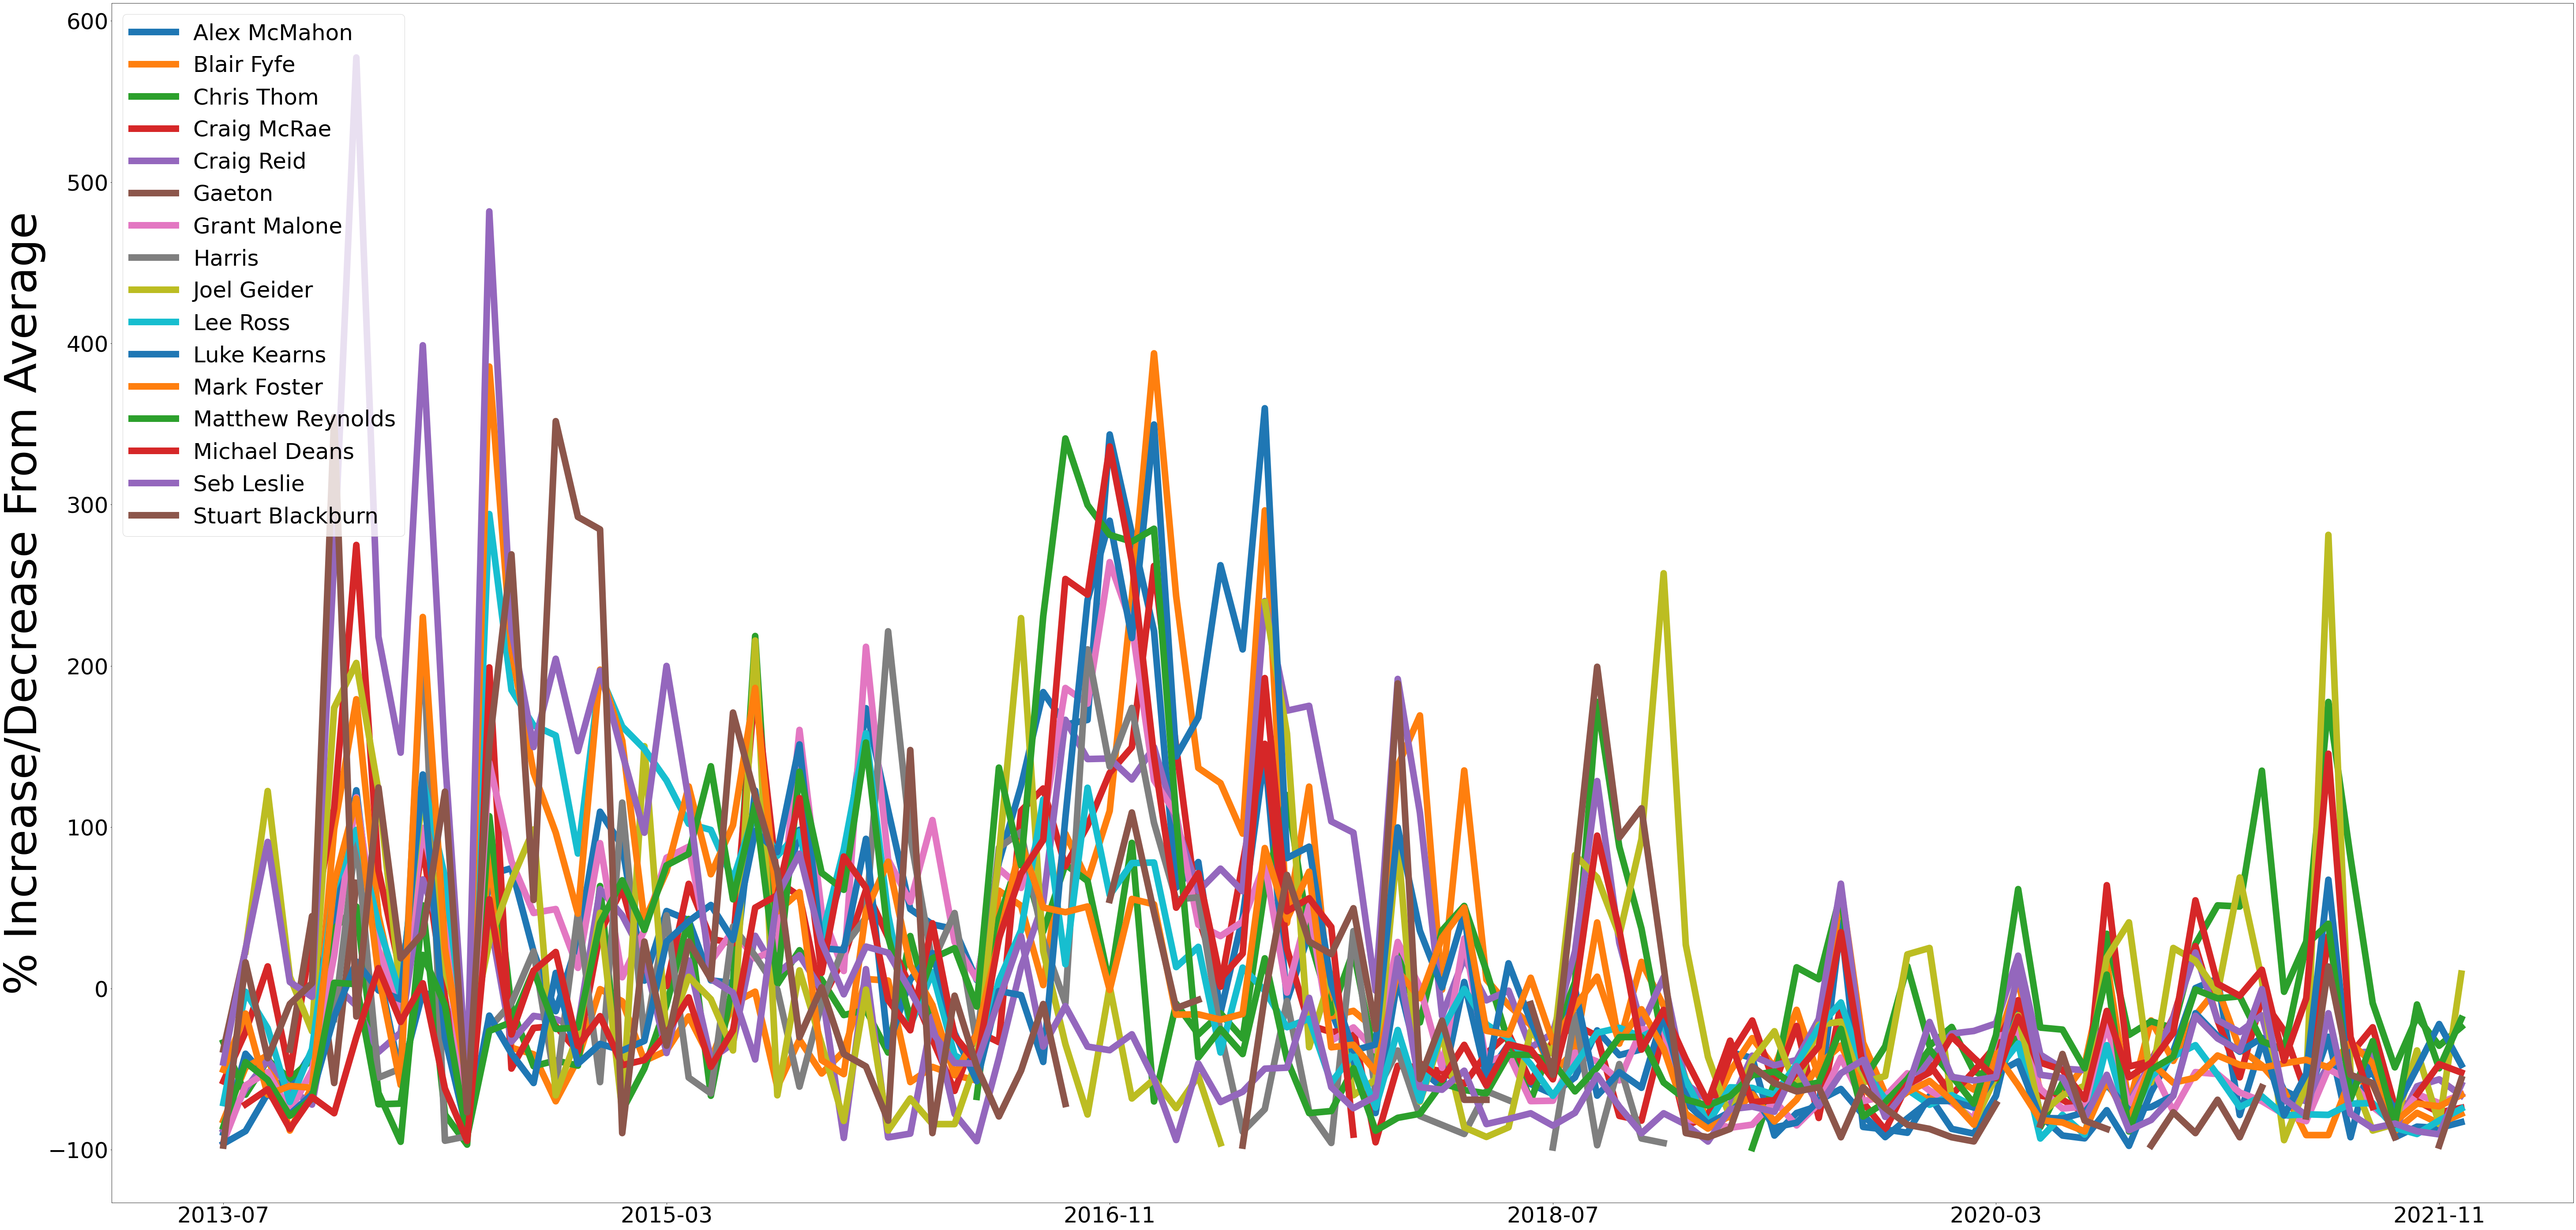

In [21]:
#Plot % increase/decrease from mean 

RatePlot = time_group4.plot(figsize=(100,50), linewidth = 15, fontsize = 50)
RatePlot.legend(loc=2, prop={'size': 50})
RatePlot.set_ylabel('% Increase/Decrease From Average',fontdict={'fontsize':100})

#Still too messy so decided to put it in an interactive graph

In [40]:
#Interactive graph

p = time_group4.plot_bokeh(kind='line',
                       title="% increase/decrease from mean",
                       xlabel='Date',
                       ylabel='% increase/decrease',
                       figsize=(950,500),
                       xticks=[1,7,13,19,25,31,37,43,49,55,61,67,73,79,85,91,97],
                       zooming=False)

#Open with Jupyter to use

## Most active day (average)

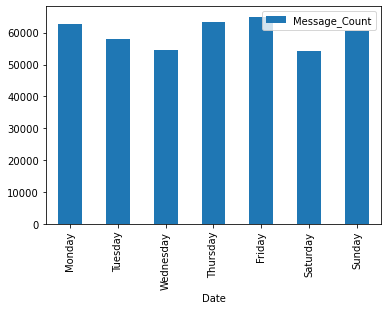

In [23]:
active_day = df.groupby(df['Date'].dt.weekday)[['Message_Count']].sum()
active_day = active_day.rename(index = {active_day.index[0]:'Monday', active_day.index[1]:'Tuesday', active_day.index[2]:'Wednesday', active_day.index[3]:'Thursday', active_day.index[4]:'Friday', active_day.index[5]:'Saturday', active_day.index[6]:'Sunday'})
active_day.plot.bar();

#message_plot = df.pivot(index="Date", columns="Name", values="Message_Count")

## Most active month (average)

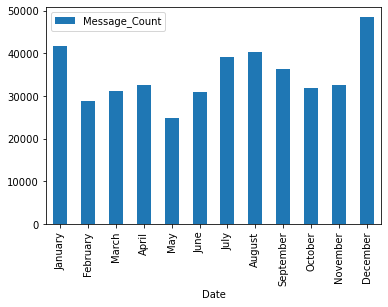

In [24]:
active_month = df.groupby([df['Date'].dt.month])[['Message_Count']].sum()
active_month = active_month.rename(index = {active_month.index[0]: 'January', active_month.index[1]: 'February', active_month.index[2]: 'March', active_month.index[3]: 'April', active_month.index[4]: 'May', active_month.index[5]: 'June', active_month.index[6]: 'July', active_month.index[7]: 'August', active_month.index[8]: 'September', active_month.index[9]: 'October', active_month.index[10]: 'November', active_month.index[11]: 'December'})
active_month.plot.bar();

## Most active day ever

In [25]:
date_group = df.groupby(['Date'])[['Name','Message_Count']].sum()
date_group.iloc[date_group['Message_Count'].argmax()]

Message_Count    1877
Name: 2016-12-25 00:00:00, dtype: int64

## Plot messages over time

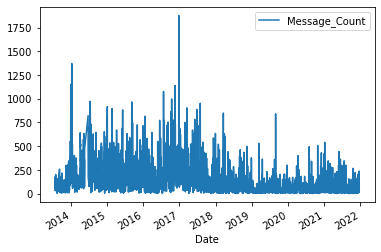

In [26]:
date_group.plot.line();

## The leaderboard

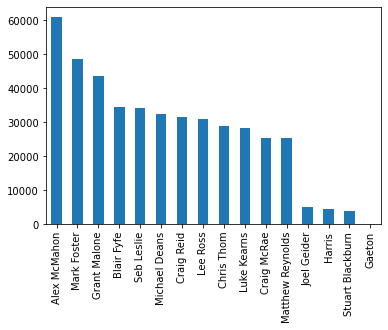

In [27]:
df_leaderboard = df['Name'].value_counts()
df_leaderboard.plot.bar();

## Group Titles

In [28]:
#Use removed data to find group titles

removed_data = df_removeddata['Name'].unique()
extra_df = pd.DataFrame(removed_data)
extra_df.columns = ['Data']
extra_df.dropna(subset = ['Data'], inplace=True) #Drop nan values
extra_df['Data'] = extra_df['Data'].astype('str') #Turn into string
extra_df

Data
0     ‎‪+44 7411 112173‬ changed the subject to “Th...
1                         ‎‪+44 7411 112173‬ was added
2                         ‎‪+44 7753 313553‬ was added
3                          ‎Matthew Reynolds was added
4                               ‎Luke Kearns was added
..                                                 ...
407   ‎Chris Thom changed the subject to “Mark - ma...
408   ‎Chris Thom changed the subject to “Mark McFo...
409   ‎Mark Foster changed the subject to “CLASS A ...
410                         ‎You're no longer an admin
411   ‎Michael Deans changed the subject to “Mark t...

[411 rows x 1 columns]

In [29]:
titledata = extra_df[extra_df['Data'].str.contains("changed the subject to")] # Find Titles
titledata

Data
0     ‎‪+44 7411 112173‬ changed the subject to “Th...
16       ‎You changed the subject to “Eyfe and Smegan”
17    ‎Mark Foster changed the subject to “Eyfe and...
19    ‎Blair Fyfe changed the subject to “Pride in ...
20    ‎Alex McMahon changed the subject to “Superbi...
..                                                 ...
405   ‎Michael Deans changed the subject to “Marks ...
407   ‎Chris Thom changed the subject to “Mark - ma...
408   ‎Chris Thom changed the subject to “Mark McFo...
409   ‎Mark Foster changed the subject to “CLASS A ...
411   ‎Michael Deans changed the subject to “Mark t...

[290 rows x 1 columns]

In [30]:
#Split and strip data
splittitle = titledata['Data'].str.split('to', n=1, expand=True)
splittitle.columns = ['Data','Title']
Title = splittitle.drop(['Data'], axis=1)
Title

Title
0     “The boys are back in town”
16              “Eyfe and Smegan”
17          “Eyfe and Shhhmeg-an”
19              “Pride in battle”
20          “Superbia In Proelia”
..                            ...
405       “Marks flight reminder”
407    “Mark - make your mind up”
408               “Mark McFoster”
409              “CLASS A 🍦 MENU”
411     “Mark the Super Spreader”

[290 rows x 1 columns]